<a href="https://colab.research.google.com/github/mohammedhemed77/NN-zero-to-hero-personal-practice/blob/main/makrmore_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
words = open ('names.txt','r').read().splitlines()
print (words [:8])
print (f"dataset length : {len(words)}")
print (f"minimum length : {min(len(w) for w  in words)}")
print (f"maximum length : {max(len(w) for w in words)}")

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']
dataset length : 32033
minimum length : 2
maximum length : 15


In [6]:
# build vocab of chars - mapping from int - > char , char -> int
chars = sorted (list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos= { i:s for s,i in stoi.items()}
print(itos)
for c in chars : print (c)
for (i,s) in enumerate(chars): print (i ,s )

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}
a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z
0 a
1 b
2 c
3 d
4 e
5 f
6 g
7 h
8 i
9 j
10 k
11 l
12 m
13 n
14 o
15 p
16 q
17 r
18 s
19 t
20 u
21 v
22 w
23 x
24 y
25 z


In [7]:
# building the dataset
block_size = 3
X , Y = [],[]

for word in words [:5]:
  # reset context
  context = [0] * block_size
  for ch in word + '.' :
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    # update context for the next char
    context = context[1:] + [ix]
    #print (''.join(itos[i] for i in context),'--->',itos[ix])

X = torch.tensor(X)
Y = torch.tensor(Y)

In [8]:
X.shape , X.dtype , Y.shape , Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [9]:
# create Embedding matrix , in the paper he embed 17000 words into 30-d
# here we embed 27 possible chars in 2 d
C = torch.randn((27,2))
embed = C[X]
print (f"embed shape = {embed.shape}")
print(embed)

embed shape = torch.Size([32, 3, 2])
tensor([[[-0.3162, -0.1793],
         [-0.3162, -0.1793],
         [-0.3162, -0.1793]],

        [[-0.3162, -0.1793],
         [-0.3162, -0.1793],
         [-0.3975,  0.1374]],

        [[-0.3162, -0.1793],
         [-0.3975,  0.1374],
         [ 1.3707, -0.9104]],

        [[-0.3975,  0.1374],
         [ 1.3707, -0.9104],
         [ 1.3707, -0.9104]],

        [[ 1.3707, -0.9104],
         [ 1.3707, -0.9104],
         [ 1.2139, -0.6413]],

        [[-0.3162, -0.1793],
         [-0.3162, -0.1793],
         [-0.3162, -0.1793]],

        [[-0.3162, -0.1793],
         [-0.3162, -0.1793],
         [ 0.9383,  0.2775]],

        [[-0.3162, -0.1793],
         [ 0.9383,  0.2775],
         [-1.1595, -0.3388]],

        [[ 0.9383,  0.2775],
         [-1.1595, -0.3388],
         [-0.7619,  0.4143]],

        [[-1.1595, -0.3388],
         [-0.7619,  0.4143],
         [ 0.7195, -0.6032]],

        [[-0.7619,  0.4143],
         [ 0.7195, -0.6032],
         [-0.76

In [10]:
Y.shape
probs = torch.randn((32,27))

probs = probs [torch.arange(32) , Y ]
probs


tensor([ 0.2798,  0.7793,  1.2063,  0.9536, -0.7616,  0.8895, -0.1973, -0.9056,
         0.5317,  1.1537, -0.2318,  0.5476,  1.1214, -1.6020, -0.9319, -0.5172,
         1.1470,  1.0026,  0.8071,  0.6682, -1.0521,  1.2160,  0.7493,  1.2310,
        -0.2268,  0.7899,  0.2075,  0.4923, -1.0376, -1.0894, -0.0857,  1.1197])

In [11]:
import torch

# Matrix b of shape (5, 3)
b = torch.tensor([[10, 20, 30],
                  [40, 50, 60],
                  [70, 80, 90],
                  [100, 110, 120],
                  [130, 140, 150]])

# Index matrix a (must contain valid row indices for b)
a = torch.tensor([[0, 2],   # Index rows 0 and 2
                  [3, 4]])  # Index rows 3 and 4

# Indexing matrix b using a
c = b[a]
print (c.shape)
print (a.shape)
print (b.shape)
print(c)


torch.Size([2, 2, 3])
torch.Size([2, 2])
torch.Size([5, 3])
tensor([[[ 10,  20,  30],
         [ 70,  80,  90]],

        [[100, 110, 120],
         [130, 140, 150]]])


In [12]:
# buliding dataset
block_size = 3
def build_dataset (words):
  X , Y = [],[]
  for word in words :
    context = [0] * block_size
    for ch in word + '.' :
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context [1:] + [ix]
  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape,Y.shape)
  return X , Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len (words))
n2 = int(0.9 * len (words))
Xtr,Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xtest,Ytest = build_dataset(words[n2:])
tensors = [Xtr,Ytr,Xdev,Ydev,Xtest,Ytest]


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [13]:
g = torch.Generator().manual_seed(2000200022) # for reproducibility
C = torch.randn((27,10) , generator = g)
W1 = torch.randn((30,200) , generator = g)
b1 = torch.randn(200 , generator = g)
W2 = torch.randn((200,27) , generator = g)
b2 = torch.randn(27 , generator = g)
parameters = [C,W1,b1,W2,b2]
sum(p.nelement()for p in parameters)

11897

In [14]:
for p in parameters :
  p.requires_grad = True

In [15]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lri = []
lossi = []
stepi = []

In [24]:
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

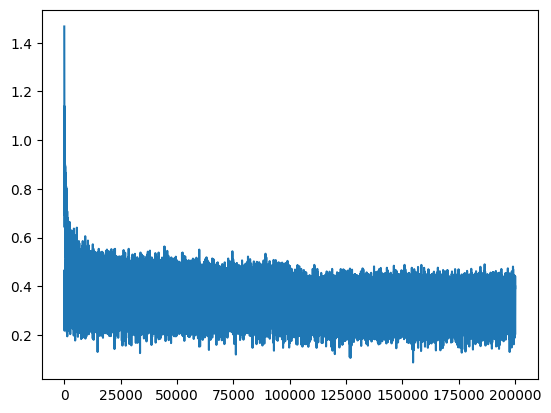

In [25]:
plt.plot(stepi, lossi)

In [26]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1123, grad_fn=<NllLossBackward0>)

In [27]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1611, grad_fn=<NllLossBackward0>)

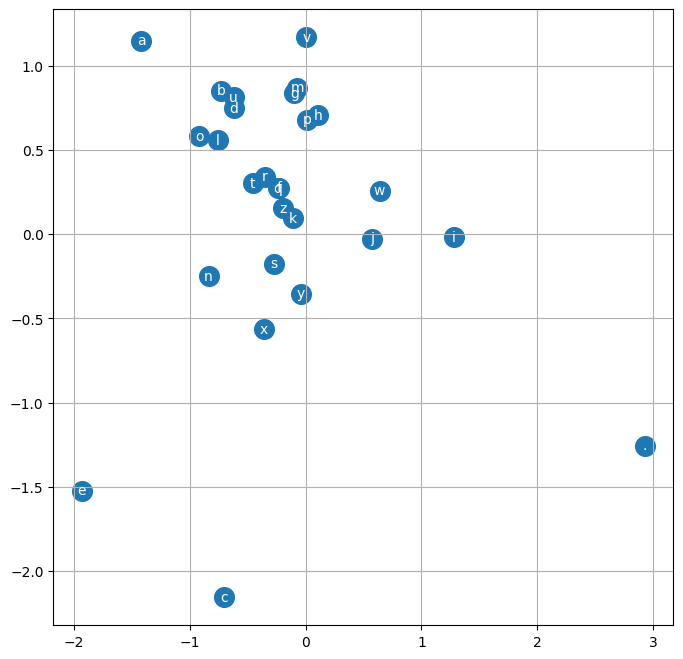

In [28]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [29]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [30]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

mona.
kmynahiee.
med.
ryla.
rethrettedra.
gradeer.
selin.
shi.
jenre.
elie.
nazarleigh.
malyan.
nosadherg.
hiriel.
kendreelynn.
nohana.
uba.
ged.
ryylene.
els.
